In [23]:
# importing libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as hc 
from sklearn.cluster import KMeans as km 

from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import fcluster 

In [24]:
# specify the directory to use
os.chdir(r'C:\buan6383')

In [25]:
#reading data
bc = pd.read_csv(r'data\bankcustomers.csv')
bc

,Unnamed: 0,id,age,sex,region,income,married,children,car,savings,checking,mortgage,pep
0,0,ID12101,48,1,1,17546.00,0,1,0,0,0,0,1
1,1,ID12102,40,0,2,30085.10,1,3,1,0,1,1,0
2,2,ID12103,51,1,1,16575.40,1,0,1,1,1,0,0
3,3,ID12104,23,1,2,20375.40,1,3,0,0,1,0,0
4,4,ID12105,57,1,3,50576.30,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,ID12696,61,1,1,47025.00,0,2,1,1,1,1,0
596,596,ID12697,30,1,1,9672.25,1,0,1,1,1,0,0
597,597,ID12698,31,1,2,15976.30,1,0,1,1,0,0,1
598,598,ID12699,29,0,1,14711.80,1,0,0,1,0,1,0


In [26]:
bc.shape

(600, 13)

In [27]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  600 non-null    int64  
 1   id          600 non-null    object 
 2   age         600 non-null    int64  
 3   sex         600 non-null    int64  
 4   region      600 non-null    int64  
 5   income      600 non-null    float64
 6   married     600 non-null    int64  
 7   children    600 non-null    int64  
 8   car         600 non-null    int64  
 9   savings     600 non-null    int64  
 10  checking    600 non-null    int64  
 11  mortgage    600 non-null    int64  
 12  pep         600 non-null    int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 61.1+ KB


In [28]:
# Checkinf for null values
bc.isna().sum()

Unnamed: 0    0
id            0
age           0
sex           0
region        0
income        0
married       0
children      0
car           0
savings       0
checking      0
mortgage      0
pep           0
dtype: int64

In [29]:
bc.head()

,Unnamed: 0,id,age,sex,region,income,married,children,car,savings,checking,mortgage,pep
0,0,ID12101,48,1,1,17546.0,0,1,0,0,0,0,1
1,1,ID12102,40,0,2,30085.1,1,3,1,0,1,1,0
2,2,ID12103,51,1,1,16575.4,1,0,1,1,1,0,0
3,3,ID12104,23,1,2,20375.4,1,3,0,0,1,0,0
4,4,ID12105,57,1,3,50576.3,1,0,0,1,0,0,0


In [30]:
print(bc['region'].unique())

[1 2 3 4]


In [31]:
df = pd.get_dummies(bc, columns=['region'])
df

,Unnamed: 0,id,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_1,region_2,region_3,region_4
0,0,ID12101,48,1,17546.00,0,1,0,0,0,0,1,True,False,False,False
1,1,ID12102,40,0,30085.10,1,3,1,0,1,1,0,False,True,False,False
2,2,ID12103,51,1,16575.40,1,0,1,1,1,0,0,True,False,False,False
3,3,ID12104,23,1,20375.40,1,3,0,0,1,0,0,False,True,False,False
4,4,ID12105,57,1,50576.30,1,0,0,1,0,0,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,ID12696,61,1,47025.00,0,2,1,1,1,1,0,True,False,False,False
596,596,ID12697,30,1,9672.25,1,0,1,1,1,0,0,True,False,False,False
597,597,ID12698,31,1,15976.30,1,0,1,1,0,0,1,False,True,False,False
598,598,ID12699,29,0,14711.80,1,0,0,1,0,1,0,True,False,False,False


In [32]:
columns_to_convert = ['region_1', 'region_2', 'region_3', 'region_4']
df[columns_to_convert] = df[columns_to_convert].astype(int)
df

,Unnamed: 0,id,age,sex,income,married,children,car,savings,checking,mortgage,pep,region_1,region_2,region_3,region_4
0,0,ID12101,48,1,17546.00,0,1,0,0,0,0,1,1,0,0,0
1,1,ID12102,40,0,30085.10,1,3,1,0,1,1,0,0,1,0,0
2,2,ID12103,51,1,16575.40,1,0,1,1,1,0,0,1,0,0,0
3,3,ID12104,23,1,20375.40,1,3,0,0,1,0,0,0,1,0,0
4,4,ID12105,57,1,50576.30,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,ID12696,61,1,47025.00,0,2,1,1,1,1,0,1,0,0,0
596,596,ID12697,30,1,9672.25,1,0,1,1,1,0,0,1,0,0,0
597,597,ID12698,31,1,15976.30,1,0,1,1,0,0,1,0,1,0,0
598,598,ID12699,29,0,14711.80,1,0,0,1,0,1,0,1,0,0,0


In [33]:
# Renaming columns
df.rename(columns = {"region_1":'inner_city',"region_2":'town',"region_3":'rural',"region_4":'suburban'},inplace=True)

In [34]:
# Drop column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [35]:
df

,id,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,ID12101,48,1,17546.00,0,1,0,0,0,0,1,1,0,0,0
1,ID12102,40,0,30085.10,1,3,1,0,1,1,0,0,1,0,0
2,ID12103,51,1,16575.40,1,0,1,1,1,0,0,1,0,0,0
3,ID12104,23,1,20375.40,1,3,0,0,1,0,0,0,1,0,0
4,ID12105,57,1,50576.30,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,1,47025.00,0,2,1,1,1,1,0,1,0,0,0
596,ID12697,30,1,9672.25,1,0,1,1,1,0,0,1,0,0,0
597,ID12698,31,1,15976.30,1,0,1,1,0,0,1,0,1,0,0
598,ID12699,29,0,14711.80,1,0,0,1,0,1,0,1,0,0,0


In [36]:
# drop id column
df.drop("id", axis =1 , inplace = True)

In [37]:
df

,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,48,1,17546.00,0,1,0,0,0,0,1,1,0,0,0
1,40,0,30085.10,1,3,1,0,1,1,0,0,1,0,0
2,51,1,16575.40,1,0,1,1,1,0,0,1,0,0,0
3,23,1,20375.40,1,3,0,0,1,0,0,0,1,0,0
4,57,1,50576.30,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1,0,0,0
596,30,1,9672.25,1,0,1,1,1,0,0,1,0,0,0
597,31,1,15976.30,1,0,1,1,0,0,1,0,1,0,0
598,29,0,14711.80,1,0,0,1,0,1,0,1,0,0,0


(array([ 32., 106., 110., 108.,  76.,  62.,  35.,  36.,  21.,  14.]),
 array([ 5014.21 , 10825.799, 16637.388, 22448.977, 28260.566, 34072.155,
        39883.744, 45695.333, 51506.922, 57318.511, 63130.1  ]),
 <BarContainer object of 10 artists>)

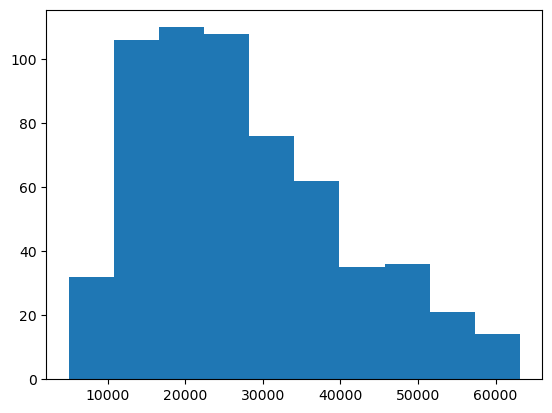

In [38]:
# Plotting income distribution
plt.hist(df["income"])

(array([  2.,  10.,  20.,  48.,  79.,  98., 118.,  99.,  75.,  51.]),
 array([ 8.52003116,  8.77332334,  9.02661552,  9.2799077 ,  9.53319988,
         9.78649206, 10.03978424, 10.29307642, 10.5463686 , 10.79966078,
        11.05295296]),
 <BarContainer object of 10 artists>)

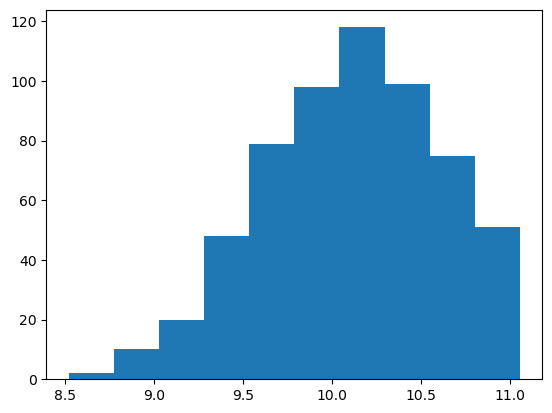

In [39]:
# Using log transform 

log_df = df.copy()
log_df.income = np.log(log_df["income"])
plt.hist(log_df["income"])

In [40]:
# Normalizing dataset
nbb = normalize(log_df)
nbb = pd.DataFrame(nbb, columns = log_df.columns)
nbb

,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0.979082,0.020398,0.199337,0.000000,0.020398,0.000000,0.000000,0.000000,0.000000,0.020398,0.020398,0.000000,0.000000,0.0
1,0.964392,0.000000,0.248615,0.024110,0.072329,0.024110,0.000000,0.024110,0.024110,0.000000,0.000000,0.024110,0.000000,0.0
2,0.981242,0.019240,0.186930,0.019240,0.000000,0.019240,0.019240,0.019240,0.000000,0.000000,0.019240,0.000000,0.000000,0.0
3,0.908837,0.039515,0.392068,0.039515,0.118544,0.000000,0.000000,0.039515,0.000000,0.000000,0.000000,0.039515,0.000000,0.0
4,0.981837,0.017225,0.186570,0.017225,0.000000,0.000000,0.017225,0.000000,0.000000,0.000000,0.000000,0.000000,0.017225,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.983520,0.016123,0.173461,0.000000,0.032247,0.016123,0.016123,0.016123,0.016123,0.000000,0.016123,0.000000,0.000000,0.0
596,0.953358,0.031779,0.291633,0.031779,0.000000,0.031779,0.031779,0.031779,0.000000,0.000000,0.031779,0.000000,0.000000,0.0
597,0.951852,0.030705,0.297189,0.030705,0.000000,0.030705,0.030705,0.000000,0.000000,0.030705,0.000000,0.030705,0.000000,0.0
598,0.947343,0.000000,0.313486,0.032667,0.000000,0.000000,0.032667,0.000000,0.032667,0.000000,0.032667,0.000000,0.000000,0.0


In [41]:
# Hierarchical Clustering with centroid linkage
clstr1 = hc.linkage(nbb, method = "centroid", metric ="euclidean")

In [42]:
clstr1[0] 

array([1.39000000e+02, 3.98000000e+02, 5.87354811e-04, 2.00000000e+00])

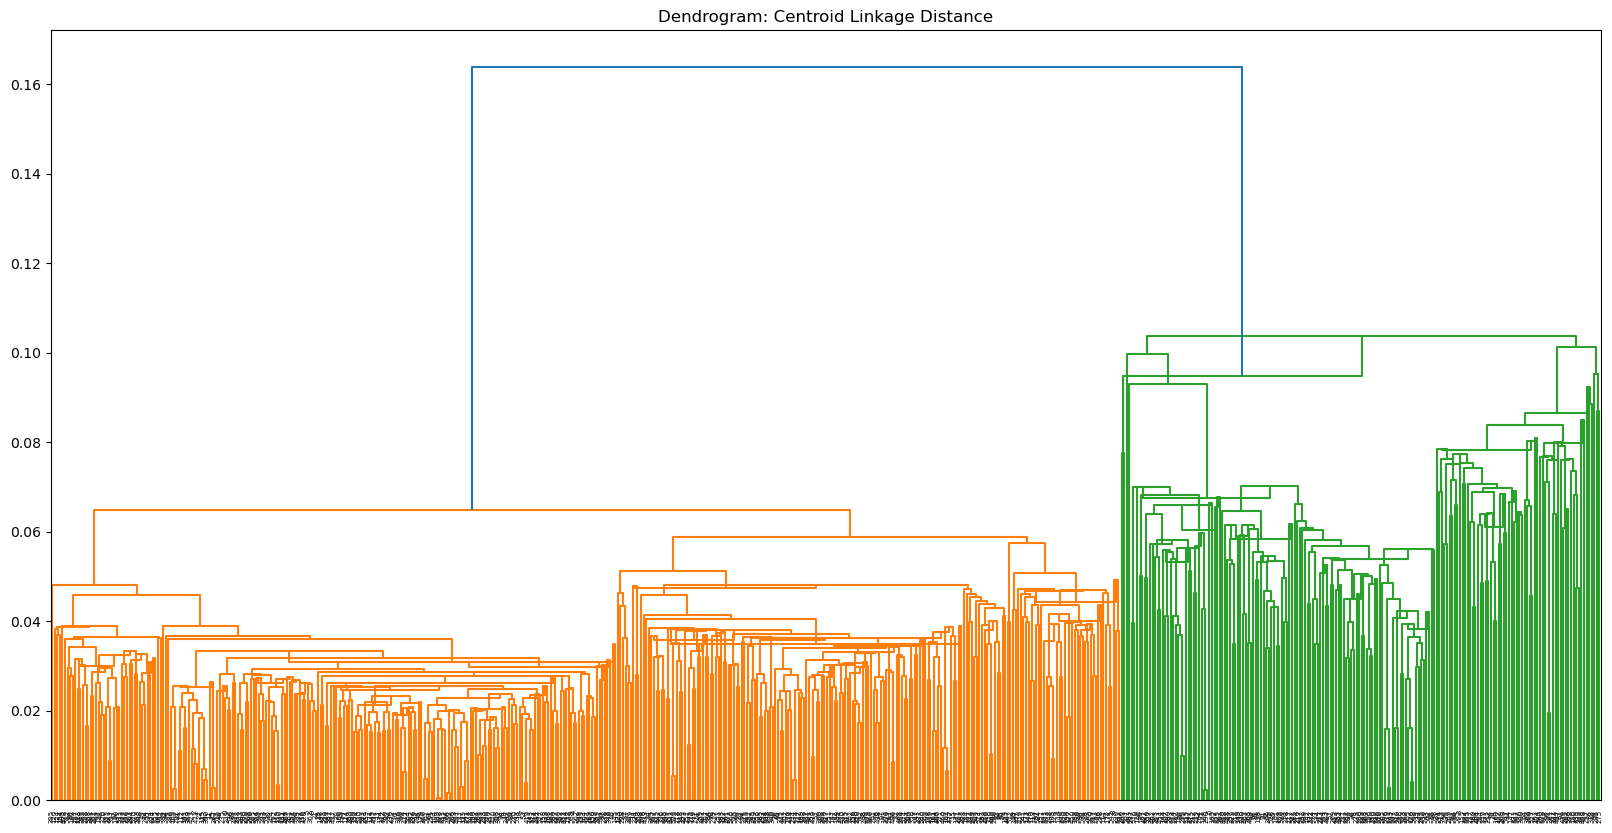

In [43]:
# Centroid Linkage Dendrogram

plt.figure(figsize=(20, 10))
plt.title("Dendrogram: Centroid Linkage Distance")
dgnbb1 = hc.dendrogram(clstr1)
plt.show()

In [44]:
# Max distance between merged clusters
max(clstr1[:,2])

0.16385555795538312

In [45]:
0.7* max(clstr1[:,2])

0.11469889056876817

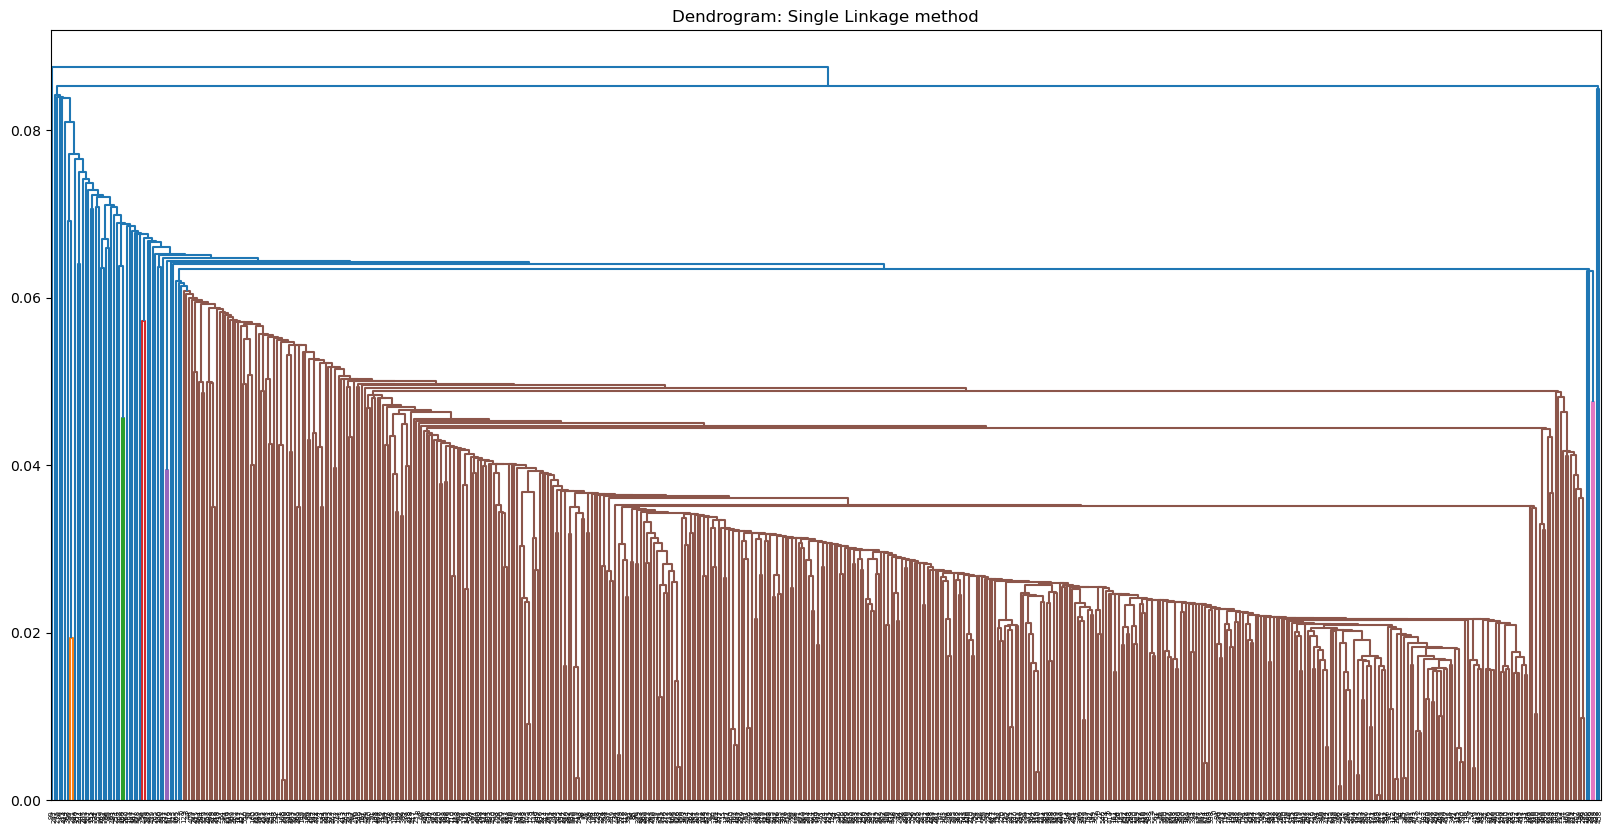

In [46]:
# Hierarchical Clustering with Single linkage

clstr2 = hc.linkage(nbb, method= 'single' , metric="euclidean")
plt.figure(figsize=(20, 10))
plt.title("Dendrogram: Single Linkage method")
dgnbb2 = hc.dendrogram(clstr2)

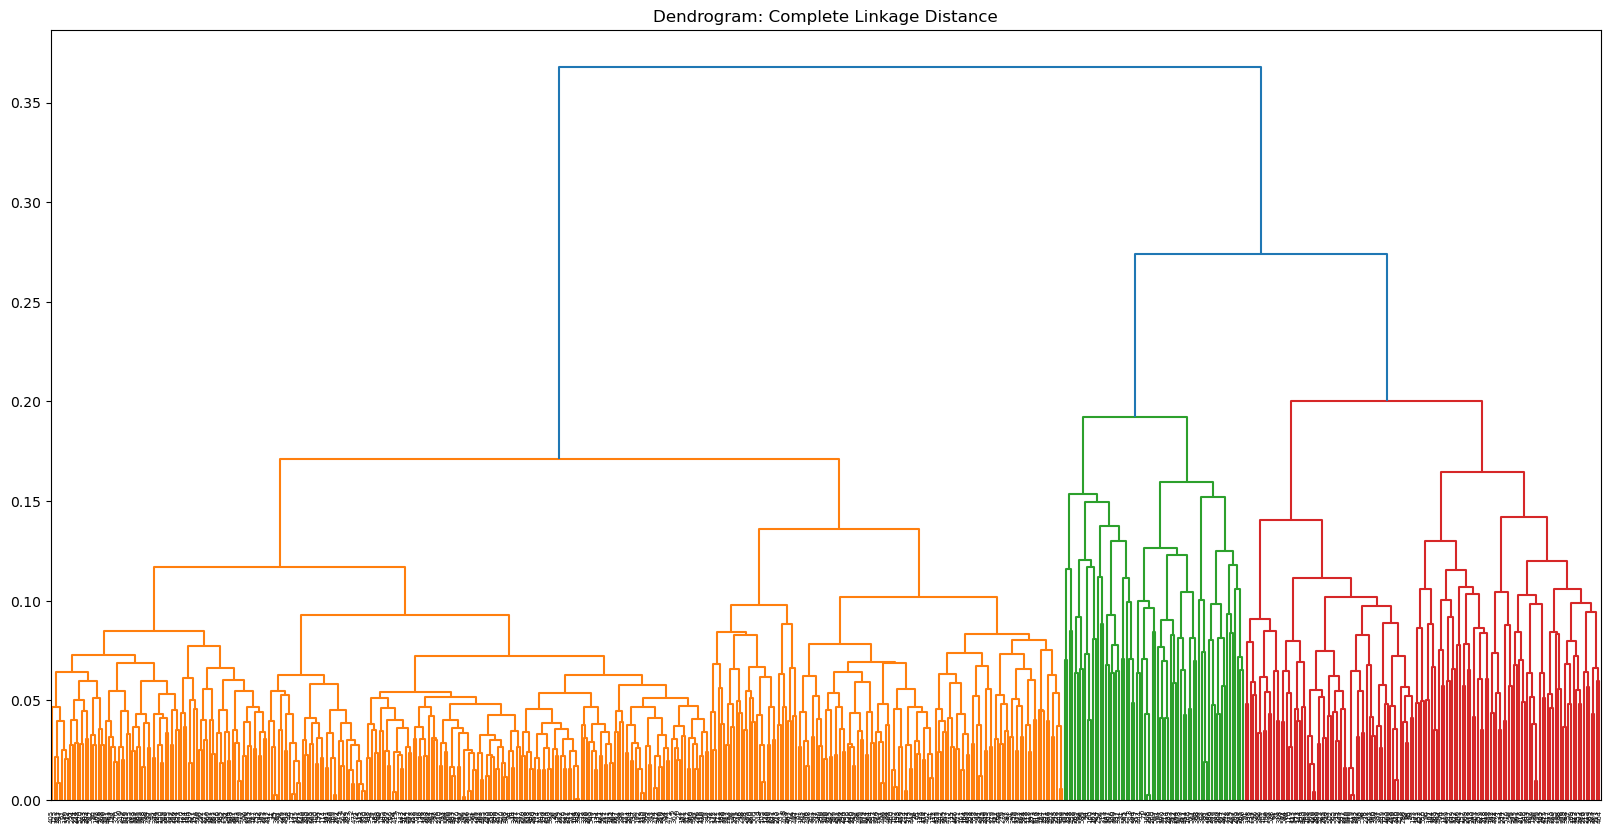

In [47]:
# Hierarchical Clustering with Complete linkage

clstr3 = hc.linkage(nbb, method= 'complete' , metric="euclidean")
plt.figure(figsize=(20, 10))
plt.title("Dendrogram: Complete Linkage Distance")
dgnbb3 = hc.dendrogram(clstr3)

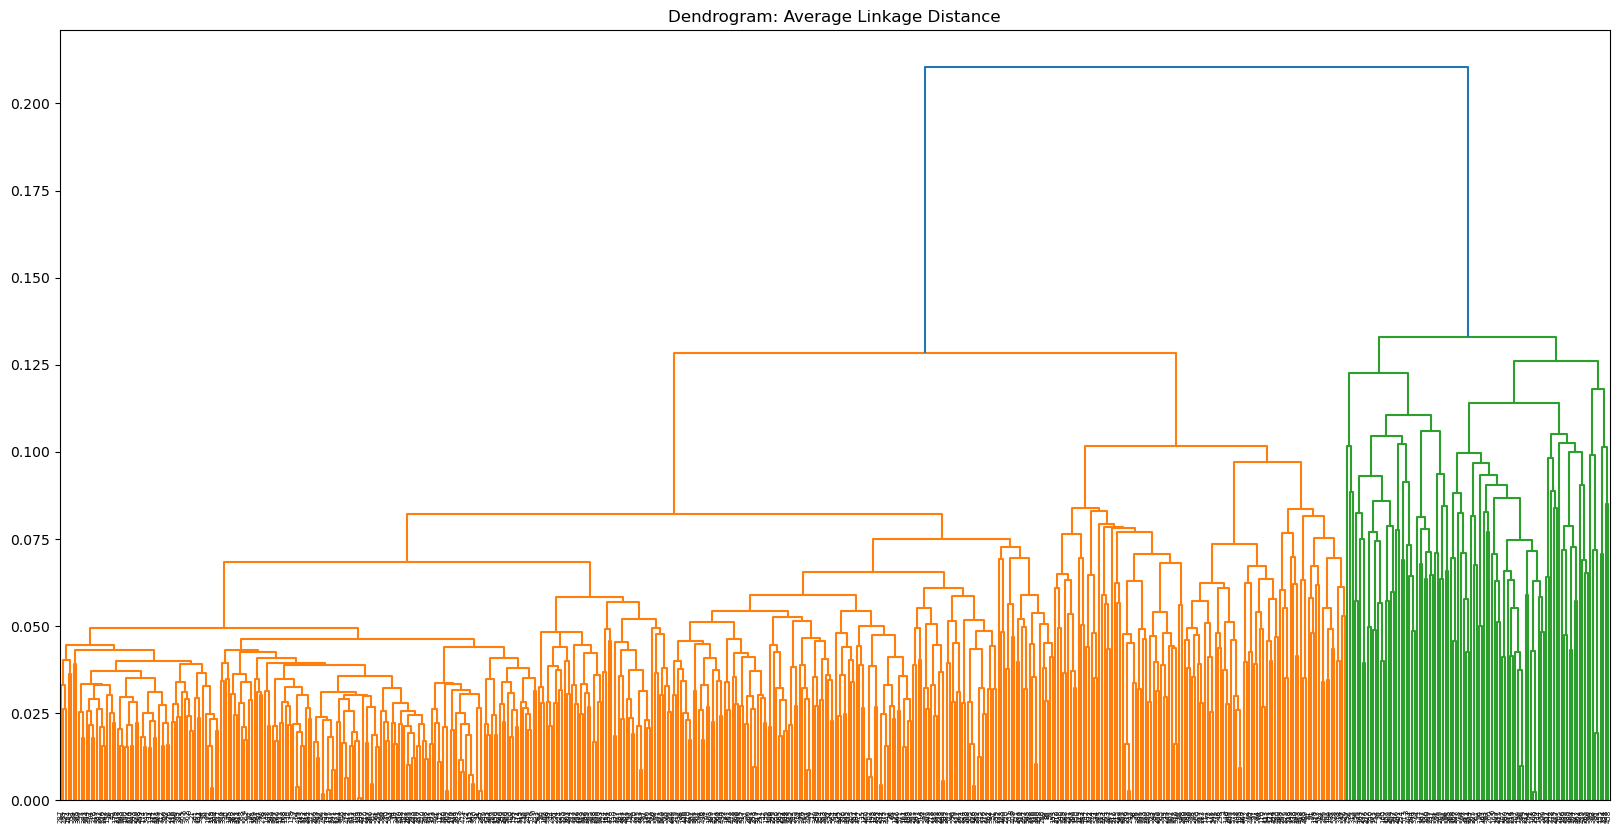

In [48]:
# Hierarchical Clustering with Average linkage

clstr4 = hc.linkage(nbb, method= 'average' , metric="euclidean")
plt.figure(figsize=(20, 10))
plt.title("Dendrogram: Average Linkage Distance")
dgnbb4 = hc.dendrogram(clstr4)

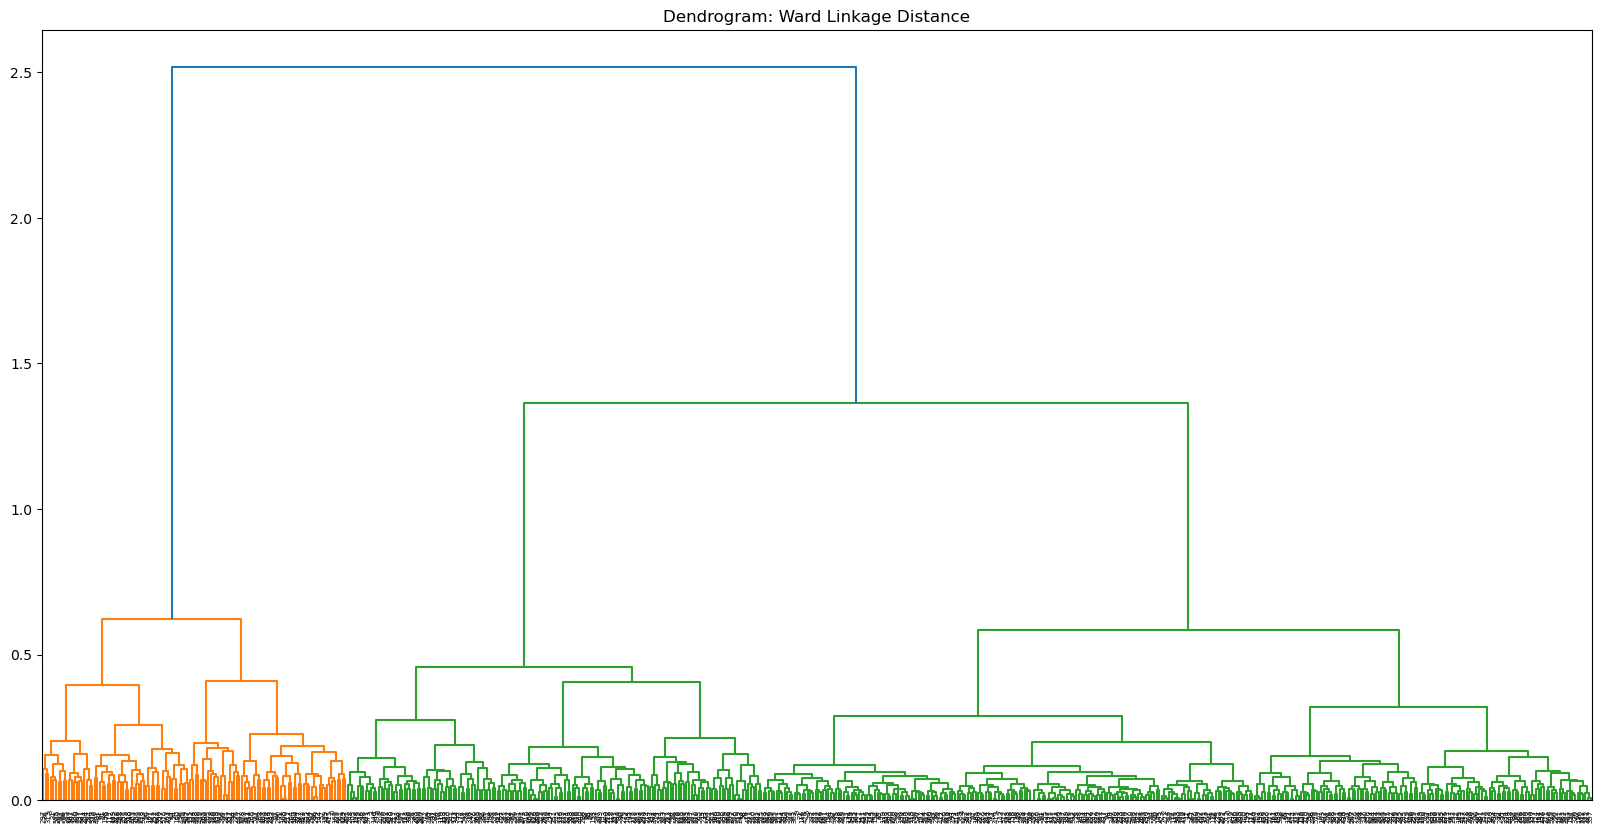

In [49]:
# Hierarchical Clustering with Ward linkage

clstr5 = hc.linkage(nbb, method= 'ward' , metric="euclidean")
plt.figure(figsize=(20, 10))
plt.title("Dendrogram: Ward Linkage Distance")
dgnbb5 = hc.dendrogram(clstr5)

In [50]:
max(clstr5[:,2])

2.5191040299303378

In [51]:
0.7* max(clstr5[:,2])

1.7633728209512363

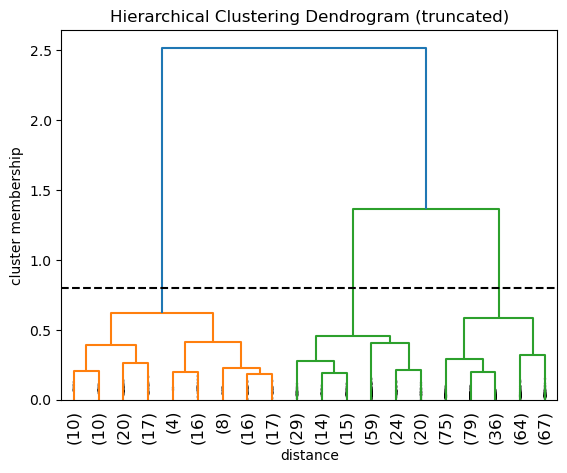

In [52]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.ylabel("cluster membership")
plt.xlabel('distance')
hc.dendrogram(clstr5, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12.,show_contracted= True)
plt.axhline(y=0.8, color='black', linestyle='--')
plt.show()

In [53]:
# Identify cluster membership
maxdist = 0.8
clusters =fcluster(clstr5,maxdist,criterion="distance")
clusters

array([3, 2, 3, 1, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3,
       3, 2, 1, 3, 3, 2, 2, 3, 3, 1, 3, 2, 3, 2, 1, 2, 3, 3, 3, 3, 3, 2,
       1, 3, 3, 2, 3, 3, 1, 2, 3, 3, 3, 3, 3, 1, 2, 2, 3, 3, 3, 1, 1, 3,
       1, 3, 2, 2, 1, 1, 2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 2, 2, 3, 2, 1, 3,
       2, 3, 2, 1, 3, 3, 3, 1, 1, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 1, 2,
       2, 2, 3, 2, 3, 3, 3, 1, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 1, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 1, 3, 1, 3, 3, 3, 2,
       3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 2, 3, 3, 1, 2, 2, 3, 3,
       2, 2, 3, 3, 1, 3, 3, 3, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       1, 1, 3, 3, 3, 2, 1, 1, 3, 1, 3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3,
       3, 2, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 1, 3, 3, 1, 2, 2, 1, 2, 2, 3,
       1, 1, 3, 3, 3, 1, 3, 3, 2, 2, 3, 1, 3, 1, 3, 2, 2, 1, 3, 2, 1, 2,
       2, 3, 2, 3, 1, 3, 3, 2, 3, 2, 3, 1, 3, 1, 1,

In [54]:
# Adding cluster id column
hclustfinal = df.copy()
hclustfinal['CLUSTER'] =clusters.tolist()
hclustfinal

,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban,CLUSTER
0,48,1,17546.00,0,1,0,0,0,0,1,1,0,0,0,3
1,40,0,30085.10,1,3,1,0,1,1,0,0,1,0,0,2
2,51,1,16575.40,1,0,1,1,1,0,0,1,0,0,0,3
3,23,1,20375.40,1,3,0,0,1,0,0,0,1,0,0,1
4,57,1,50576.30,1,0,0,1,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1,0,0,0,3
596,30,1,9672.25,1,0,1,1,1,0,0,1,0,0,0,2
597,31,1,15976.30,1,0,1,1,0,0,1,0,1,0,0,2
598,29,0,14711.80,1,0,0,1,0,1,0,1,0,0,0,2


In [55]:
# Grouping by cluster
hclustfinal2 = hclustfinal.groupby("CLUSTER",as_index =False).mean()
hclustfinal2

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,1,22.584746,0.457627,14913.646441,0.661017,1.186441,0.406780,0.610169,0.847458,0.338983,0.330508,0.508475,0.203390,0.186441,0.101695
1,2,34.316770,0.478261,22748.106522,0.652174,0.968944,0.534161,0.614907,0.695652,0.397516,0.440994,0.416149,0.409938,0.093168,0.080745
2,3,53.728972,0.526480,34555.025857,0.663551,0.968847,0.504673,0.757009,0.757009,0.327103,0.510903,0.442368,0.258567,0.183801,0.115265


In [56]:
hclustfinal2.T

,0,1,2
CLUSTER,1.000000,2.000000,3.000000
age,22.584746,34.316770,53.728972
sex,0.457627,0.478261,0.526480
income,14913.646441,22748.106522,34555.025857
married,0.661017,0.652174,0.663551
children,1.186441,0.968944,0.968847
car,0.406780,0.534161,0.504673
savings,0.610169,0.614907,0.757009
checking,0.847458,0.695652,0.757009
mortgage,0.338983,0.397516,0.327103


In [57]:
df.head()

,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,48,1,17546.0,0,1,0,0,0,0,1,1,0,0,0
1,40,0,30085.1,1,3,1,0,1,1,0,0,1,0,0
2,51,1,16575.4,1,0,1,1,1,0,0,1,0,0,0
3,23,1,20375.4,1,3,0,0,1,0,0,0,1,0,0
4,57,1,50576.3,1,0,0,1,0,0,0,0,0,1,0


In [58]:
nbb.head()

,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0.979082,0.020398,0.199337,0.000000,0.020398,0.00000,0.000000,0.000000,0.00000,0.020398,0.020398,0.000000,0.000000,0.0
1,0.964392,0.000000,0.248615,0.024110,0.072329,0.02411,0.000000,0.024110,0.02411,0.000000,0.000000,0.024110,0.000000,0.0
2,0.981242,0.019240,0.186930,0.019240,0.000000,0.01924,0.019240,0.019240,0.00000,0.000000,0.019240,0.000000,0.000000,0.0
3,0.908837,0.039515,0.392068,0.039515,0.118544,0.00000,0.000000,0.039515,0.00000,0.000000,0.000000,0.039515,0.000000,0.0
4,0.981837,0.017225,0.186570,0.017225,0.000000,0.00000,0.017225,0.000000,0.00000,0.000000,0.000000,0.000000,0.017225,0.0


### With k = 4

In [59]:
# K-means with 4 clusters
clstr4 = km(n_clusters=4, random_state=0)
clstr4.fit(nbb)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [60]:
# Cluster centers
clstr4.cluster_centers_

array([[0.91454143, 0.02132696, 0.38090785, 0.02599207, 0.09368285,
        0.01869814, 0.02770977, 0.03103241, 0.0115458 , 0.00434579,
        0.01748195, 0.01075463, 0.00788266, 0.00370847],
       [0.98082448, 0.00963669, 0.18737809, 0.01199549, 0.0185746 ,
        0.00898805, 0.01388227, 0.013792  , 0.00586032, 0.00943674,
        0.0076728 , 0.0048855 , 0.00326638, 0.00223827],
       [0.96029251, 0.01238452, 0.26885565, 0.01767782, 0.02369978,
        0.01412849, 0.01612682, 0.01919246, 0.0105115 , 0.0111747 ,
        0.0114836 , 0.00991649, 0.00349223, 0.00194231],
       [0.91544252, 0.017011  , 0.38927718, 0.02654751, 0.01301844,
        0.0155947 , 0.02326202, 0.03444001, 0.01503823, 0.0201616 ,
        0.02292433, 0.00754963, 0.0057167 , 0.00466974]])

In [61]:
# Assign cluster membership labels
cluster4 = clstr4.labels_
cluster4

array([1, 2, 1, 0, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 3, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 3, 2, 2, 2, 1, 1, 3, 3, 1,
       0, 2, 2, 2, 0, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 3, 1,
       2, 1, 2, 0, 1, 1, 1, 3, 3, 2, 2, 3, 1, 0, 1, 2, 1, 2, 1, 3, 3, 2,
       2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 3, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 0, 1, 0, 1, 2, 1, 2,
       2, 0, 1, 0, 1, 1, 0, 1, 1, 3, 2, 3, 3, 3, 2, 1, 1, 0, 2, 2, 1, 1,
       2, 2, 1, 1, 3, 1, 1, 1, 2, 1, 3, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1,
       0, 3, 1, 1, 1, 2, 3, 3, 1, 3, 1, 3, 1, 1, 3, 2, 3, 3, 3, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 0, 3, 0, 1,
       1, 2, 1, 1, 0, 3, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2, 2, 3, 2, 2, 1,
       3, 3, 1, 1, 1, 0, 1, 1, 2, 2, 2, 3, 1, 3, 1, 2, 2, 3, 1, 2, 0, 3,
       2, 1, 2, 1, 3, 2, 1, 3, 2, 2, 1, 0, 1, 3, 3,

In [62]:
# Add to the data frame
nbb4 = nbb.copy()
tesx4 = df.copy()
tesx4["CLUSTER"] = cluster4.tolist()
tesx4

,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban,CLUSTER
0,48,1,17546.00,0,1,0,0,0,0,1,1,0,0,0,1
1,40,0,30085.10,1,3,1,0,1,1,0,0,1,0,0,2
2,51,1,16575.40,1,0,1,1,1,0,0,1,0,0,0,1
3,23,1,20375.40,1,3,0,0,1,0,0,0,1,0,0,0
4,57,1,50576.30,1,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,61,1,47025.00,0,2,1,1,1,1,0,1,0,0,0,1
596,30,1,9672.25,1,0,1,1,1,0,0,1,0,0,0,2
597,31,1,15976.30,1,0,1,1,0,0,1,0,1,0,0,2
598,29,0,14711.80,1,0,0,1,0,1,0,1,0,0,0,2


In [63]:
#Check cluster size
tesx4["CLUSTER"].value_counts()

CLUSTER
1    285
2    183
3     80
0     52
Name: count, dtype: int64

In [64]:
# Get avg by clusters to see how the clusters are different
nbb4Avg = tesx4.groupby("CLUSTER", as_index=False).mean()
nbb4Avg

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0,23.365385,0.538462,15385.434231,0.653846,2.365385,0.461538,0.692308,0.769231,0.288462,0.115385,0.442308,0.269231,0.192308,0.096154
1,1,55.294737,0.540351,35314.925263,0.663158,1.042105,0.505263,0.775439,0.761404,0.326316,0.529825,0.431579,0.266667,0.178947,0.122807
2,2,36.306011,0.459016,24390.911202,0.661202,0.885246,0.530055,0.606557,0.715847,0.393443,0.420765,0.426230,0.371585,0.131148,0.071038
3,3,22.737500,0.425000,14826.071250,0.650000,0.312500,0.387500,0.575000,0.837500,0.362500,0.500000,0.562500,0.187500,0.137500,0.112500


### With k = 3

In [65]:
# K-means with 3 clusters

clstr3 = km(n_clusters=3, random_state=0)
clstr3.fit(nbb)
print(clstr3.cluster_centers_)
clusters3 = clstr3.labels_
print(clusters3)
tesx3 = df.copy()
tesx3['CLUSTER'] = clusters3.tolist()
print(tesx3['CLUSTER'].value_counts())
nbb3Avg = tesx3.groupby('CLUSTER', as_index=False).mean()
nbb3Avg

[[0.91392185 0.01877372 0.38850073 0.02673209 0.04645733 0.01652319
  0.02566246 0.03360578 0.01403718 0.01405212 0.02096822 0.00866795
  0.00688281 0.00421936]
 [0.98082448 0.00963669 0.18737809 0.01199549 0.0185746  0.00898805
  0.01388227 0.013792   0.00586032 0.00943674 0.0076728  0.0048855
  0.00326638 0.00223827]
 [0.95963456 0.0125437  0.27089352 0.01768352 0.02326147 0.0144099
  0.01597676 0.01929512 0.01036169 0.01118154 0.0116535  0.0099776
  0.00338136 0.00206467]]
[1 2 1 0 1 1 0 1 2 1 1 1 1 1 2 2 2 1 1 2 1 1 1 2 0 1 1 2 2 1 1 0 1 2 2 0 0
 2 1 1 1 1 1 2 0 1 1 2 1 1 0 2 1 1 1 1 1 0 2 2 2 1 1 0 0 1 0 2 2 2 0 0 2 1
 1 1 1 1 2 1 1 2 2 2 1 2 0 1 2 1 2 0 1 1 1 0 0 2 2 0 1 0 1 2 1 2 1 0 0 2 2
 2 1 2 1 1 1 0 2 1 1 1 2 2 1 1 2 1 2 0 1 1 1 1 1 1 0 1 1 1 1 1 2 1 0 1 2 0
 1 0 1 2 1 2 2 0 1 0 1 1 0 1 1 0 2 0 0 0 2 1 1 0 2 2 1 1 2 2 1 1 0 1 1 1 2
 1 0 1 2 2 1 2 1 2 1 1 2 1 0 0 1 1 1 2 0 0 1 0 1 0 1 1 0 2 0 0 2 2 2 2 2 1
 2 1 1 1 1 1 2 2 1 2 2 2 1 1 1 0 0 0 0 1 1 2 1 1 0 0 2 2 1 2 0 1 0 1 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0,22.777778,0.468254,14955.448730,0.658730,1.158730,0.404762,0.634921,0.817460,0.341270,0.349206,0.515873,0.214286,0.166667,0.103175
1,1,55.294737,0.540351,35314.925263,0.663158,1.042105,0.505263,0.775439,0.761404,0.326316,0.529825,0.431579,0.266667,0.178947,0.122807
2,2,36.021164,0.460317,24154.912646,0.656085,0.867725,0.534392,0.597884,0.714286,0.386243,0.417989,0.428571,0.370370,0.126984,0.074074


### With k = 5

In [66]:
# K-means with 5 clusters

clstr5 = km(n_clusters=5, random_state=0)
clstr5.fit(nbb)
print(clstr5.cluster_centers_)
clusters5 = clstr5.labels_
print(clusters5)
tesx5 = df.copy()
tesx5['CLUSTER'] = clusters5.tolist()
print(tesx3['CLUSTER'].value_counts())
nbb5Avg = tesx5.groupby('CLUSTER', as_index=False).mean()
nbb5Avg

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[[0.90885808 0.02180204 0.39310757 0.02568642 0.09774996 0.02013769
  0.02867128 0.03386828 0.0118478  0.00293705 0.0159463  0.01276252
  0.00890206 0.00384595]
 [0.98266542 0.00976237 0.17868108 0.01093278 0.01852627 0.00907228
  0.0134737  0.01285018 0.00552771 0.00920594 0.00802626 0.0042888
  0.00292328 0.00189083]
 [0.94612813 0.01645076 0.31232733 0.02076442 0.03036677 0.01659329
  0.01858317 0.02369985 0.01112301 0.01323133 0.01540611 0.009823
  0.00405271 0.00250382]
 [0.90777007 0.01488182 0.40652115 0.02911184 0.01364009 0.01429758
  0.02594642 0.0376414  0.01670673 0.02147755 0.02585797 0.0060108
  0.00555244 0.00533435]
 [0.9687029  0.01059432 0.23993457 0.01613728 0.01950586 0.01132307
  0.01493026 0.01684557 0.00899765 0.01036599 0.008676   0.00873726
  0.00387807 0.00237284]]
[1 4 1 0 1 1 3 1 4 1 1 1 4 1 4 4 4 4 1 2 1 1 1 2 0 1 4 4 4 1 1 0 4 2 4 2 0
 4 4 1 1 4 1 2 0 1 1 2 1 1 0 4 4 1 1 1 1 2 2 2 4 1 4 3 3 4 0 4 2 2 0 3 2 1
 1 1 4 1 2 1 1 2 2 4 1 2 3 1 2 1 4 2 1 1 1 3 3 2

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0,22.190476,0.523810,13855.049048,0.619048,2.380952,0.476190,0.690476,0.809524,0.285714,0.071429,0.380952,0.309524,0.214286,0.095238
1,1,57.986607,0.571429,37006.363393,0.642857,1.084821,0.531250,0.790179,0.750000,0.325893,0.544643,0.468750,0.250000,0.169643,0.111607
2,2,30.078431,0.509804,20283.367745,0.656863,0.980392,0.529412,0.598039,0.754902,0.352941,0.421569,0.480392,0.313725,0.127451,0.078431
3,3,21.438596,0.350877,14396.827368,0.684211,0.315789,0.333333,0.614035,0.877193,0.385965,0.508772,0.614035,0.140351,0.122807,0.122807
4,4,41.291429,0.445714,27163.192000,0.685714,0.834286,0.480000,0.640000,0.720000,0.377143,0.440000,0.365714,0.365714,0.165714,0.102857


In [67]:
nbb5Avg.T

,0,1,2,3,4
CLUSTER,0.000000,1.000000,2.000000,3.000000,4.000000
age,22.190476,57.986607,30.078431,21.438596,41.291429
sex,0.523810,0.571429,0.509804,0.350877,0.445714
income,13855.049048,37006.363393,20283.367745,14396.827368,27163.192000
married,0.619048,0.642857,0.656863,0.684211,0.685714
children,2.380952,1.084821,0.980392,0.315789,0.834286
car,0.476190,0.531250,0.529412,0.333333,0.480000
savings,0.690476,0.790179,0.598039,0.614035,0.640000
checking,0.809524,0.750000,0.754902,0.877193,0.720000
mortgage,0.285714,0.325893,0.352941,0.385965,0.377143


### With k = 6

In [68]:
# K-means with 6 clusters

clstr6 = km(n_clusters=6, random_state=0)
clstr6.fit(nbb)
print(clstr6.cluster_centers_)
clusters6 = clstr6.labels_
print(clusters6)
tesx6 = df.copy()
tesx6['CLUSTER'] = clusters6.tolist()
print(tesx6['CLUSTER'].value_counts())
nbb6Avg = tesx6.groupby('CLUSTER', as_index=False).mean()
nbb6Avg

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[[0.90885808 0.02180204 0.39310757 0.02568642 0.09774996 0.02013769
  0.02867128 0.03386828 0.0118478  0.00293705 0.0159463  0.01276252
  0.00890206 0.00384595]
 [0.98382967 0.0098388  0.17306847 0.01086609 0.01689484 0.00855737
  0.01289816 0.01234805 0.00539183 0.00918479 0.00835853 0.00396332
  0.00253706 0.00166901]
 [0.94154498 0.0192812  0.32616751 0.02147709 0.02498104 0.0156171
  0.01828137 0.02308753 0.00985223 0.0128321  0.01854886 0.00925755
  0.0030775  0.00251024]
 [0.9057793  0.01419445 0.41079251 0.02836753 0.01423889 0.01567234
  0.0256102  0.0384297  0.01759815 0.02214176 0.02480079 0.00658876
  0.00608633 0.00584727]
 [0.96155034 0.01130999 0.26483103 0.01797556 0.02842799 0.01345367
  0.01669746 0.01966748 0.01231603 0.01135963 0.01019789 0.01027152
  0.00407107 0.00178122]
 [0.97413026 0.00952622 0.21873774 0.01438111 0.01894033 0.01072752
  0.01520548 0.01610375 0.00659655 0.01014825 0.00728513 0.00682872
  0.00438459 0.0029067 ]]
[1 4 1 0 1 1 3 1 4 1 1 1 5 1 4 4 4

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0,22.190476,0.523810,13855.049048,0.619048,2.380952,0.476190,0.690476,0.809524,0.285714,0.071429,0.380952,0.309524,0.214286,0.095238
1,1,59.917582,0.593407,38250.163736,0.659341,1.032967,0.521978,0.785714,0.747253,0.329670,0.560440,0.500000,0.241758,0.153846,0.104396
2,2,28.384615,0.576923,18796.995000,0.641026,0.756410,0.474359,0.551282,0.692308,0.294872,0.384615,0.551282,0.282051,0.089744,0.076923
3,3,21.076923,0.326923,13972.564615,0.653846,0.326923,0.365385,0.596154,0.884615,0.403846,0.519231,0.576923,0.153846,0.134615,0.134615
4,4,36.719626,0.429907,25039.859813,0.682243,1.084112,0.514019,0.635514,0.747664,0.467290,0.429907,0.392523,0.392523,0.149533,0.065421
5,5,45.762590,0.446043,29489.013669,0.669065,0.913669,0.503597,0.719424,0.755396,0.309353,0.474820,0.338129,0.316547,0.208633,0.136691


### With k = 7

In [69]:
# K-means with 7 clusters

clstr7 = km(n_clusters=7, random_state=0)
clstr7.fit(nbb)
print(clstr7.cluster_centers_)
clusters7 = clstr7.labels_
print(clusters7)
tesx7 = df.copy()
tesx7['CLUSTER'] = clusters7.tolist()
print(tesx7['CLUSTER'].value_counts())
nbb7Avg = tesx7.groupby('CLUSTER', as_index=False).mean()
nbb7Avg

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[[0.91127362 0.01917521 0.38800802 0.02588995 0.0993436  0.01861734
  0.02791526 0.03251159 0.01181328 0.00324621 0.01512455 0.01295822
  0.00856538 0.00425079]
 [0.98388145 0.0098348  0.17280129 0.01098683 0.01676394 0.00854981
  0.01293883 0.0123826  0.00545174 0.00907088 0.00823543 0.00400735
  0.00256525 0.00168756]
 [0.94546933 0.01731016 0.31451685 0.02030079 0.03289182 0.01680564
  0.017535   0.02156875 0.01221193 0.01200037 0.01684203 0.00992096
  0.00227705 0.00310774]
 [0.88926127 0.02080782 0.44320992 0.03432715 0.02755028 0.01565938
  0.02602524 0.0417386  0.01899394 0.02189621 0.02575887 0.00506705
  0.01048382 0.00534593]
 [0.96284853 0.01175605 0.26090518 0.01691482 0.02487508 0.01393743
  0.01596311 0.01885929 0.0106892  0.01090922 0.00960387 0.01116937
  0.00382053 0.00125961]
 [0.97447856 0.00949603 0.21718311 0.0143756  0.01973855 0.01055058
  0.01555376 0.01613633 0.00684269 0.01010618 0.00766636 0.00619188
  0.00436758 0.00301516]
 [0.92344035 0.01517073 0.37326403

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0,22.526316,0.473684,13928.428421,0.631579,2.447368,0.447368,0.684211,0.789474,0.289474,0.078947,0.368421,0.315789,0.210526,0.105263
1,1,60.022222,0.594444,38366.002222,0.666667,1.027778,0.522222,0.788889,0.750000,0.333333,0.555556,0.494444,0.244444,0.155556,0.105556
2,2,29.577465,0.535211,19132.659859,0.633803,1.028169,0.521127,0.549296,0.676056,0.380282,0.380282,0.521127,0.309859,0.070423,0.098592
3,3,19.111111,0.444444,13968.480000,0.740741,0.592593,0.333333,0.555556,0.888889,0.407407,0.481481,0.555556,0.111111,0.222222,0.111111
4,4,37.394231,0.451923,25556.009615,0.653846,0.971154,0.538462,0.615385,0.730769,0.413462,0.423077,0.375000,0.432692,0.144231,0.048077
5,5,46.111940,0.447761,29691.641045,0.671642,0.955224,0.500000,0.738806,0.761194,0.320896,0.477612,0.358209,0.291045,0.208955,0.141791
6,6,23.760870,0.391304,15373.594348,0.630435,0.239130,0.347826,0.630435,0.869565,0.304348,0.500000,0.586957,0.173913,0.130435,0.108696


### With k = 8

In [70]:
# K-means with 8 clusters

clstr8 = km(n_clusters=8, random_state=0)
clstr8.fit(nbb)
print(clstr8.cluster_centers_)
clusters8 = clstr8.labels_
print(clusters8)
tesx8 = df.copy()
tesx8['CLUSTER'] = clusters8.tolist()
print(tesx8['CLUSTER'].value_counts())
nbb8Avg = tesx8.groupby('CLUSTER', as_index=False).mean()
nbb8Avg

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[[0.93075746 0.02072974 0.34663296 0.02534686 0.08215961 0.01831914
  0.0234469  0.02418234 0.01051897 0.00531929 0.01569783 0.00841963
  0.00750776 0.00434457]
 [0.97852385 0.00967653 0.19661577 0.01128016 0.0395486  0.00933782
  0.01532748 0.0151078  0.00431389 0.01022491 0.00661467 0.00456486
  0.00589423 0.00195662]
 [0.94479256 0.01821207 0.31848023 0.02141172 0.00920013 0.01616587
  0.01838914 0.02416921 0.01071597 0.0139908  0.01623267 0.01112045
  0.00215469 0.0030991 ]
 [0.98412233 0.00941986 0.17218392 0.01106176 0.01103522 0.00856709
  0.01294521 0.01227863 0.00549647 0.00894584 0.00929046 0.0039148
  0.00164579 0.00155818]
 [0.90809615 0.01356996 0.40599416 0.02844436 0.01405559 0.01589954
  0.02444304 0.03735044 0.01760784 0.02266951 0.02525467 0.00715238
  0.00652238 0.00381931]
 [0.95963765 0.01070612 0.2678778  0.0158797  0.0572677  0.01470766
  0.01628788 0.02042351 0.00927951 0.00990478 0.01312752 0.00806862
  0.0040303  0.00150926]
 [0.96942524 0.01081747 0.23868011 

,CLUSTER,age,sex,income,married,children,car,savings,checking,mortgage,pep,inner_city,town,rural,suburban
0,0,26.058824,0.588235,16683.253529,0.705882,2.294118,0.500000,0.647059,0.676471,0.294118,0.147059,0.441176,0.235294,0.205882,0.117647
1,1,51.931034,0.517241,33077.740230,0.597701,2.103448,0.494253,0.804598,0.793103,0.229885,0.540230,0.333333,0.241379,0.321839,0.103448
2,2,29.222222,0.555556,18877.703492,0.666667,0.285714,0.507937,0.571429,0.746032,0.333333,0.428571,0.492063,0.349206,0.063492,0.095238
3,3,60.380000,0.573333,39039.993333,0.673333,0.700000,0.526667,0.793333,0.746667,0.340000,0.553333,0.560000,0.240000,0.100000,0.100000
4,4,21.425926,0.314815,14354.048889,0.666667,0.333333,0.370370,0.574074,0.870370,0.407407,0.537037,0.592593,0.166667,0.148148,0.092593
5,5,36.200000,0.400000,24222.405455,0.600000,2.163636,0.563636,0.600000,0.763636,0.345455,0.363636,0.490909,0.309091,0.145455,0.054545
6,6,41.553030,0.462121,27075.655303,0.696970,0.234848,0.477273,0.651515,0.696970,0.446970,0.469697,0.303030,0.401515,0.166667,0.128788
7,7,20.080000,0.560000,13711.718000,0.640000,2.200000,0.440000,0.680000,0.920000,0.280000,0.040000,0.440000,0.280000,0.160000,0.120000
